<a href="https://colab.research.google.com/github/mrrajeev29/Elephant_Image_Classification/blob/main/Elephant_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd
import os
import random
import pathlib
import PIL

In [111]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [104]:
train_data=pathlib.Path('/content/drive/MyDrive/train')

In [105]:
test_data=pathlib.Path('/content/drive/MyDrive/test')

In [113]:
list(train_data.glob('*'))

[PosixPath('/content/drive/MyDrive/train/African'),
 PosixPath('/content/drive/MyDrive/train/Asian')]

In [146]:
list(train_data.glob('*/*'))

[PosixPath('/content/drive/MyDrive/train/African/af_tr108.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr101.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr100.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr105.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr106.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr102.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr109.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr112.jpeg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr111.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr107.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr1.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr110.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr103.jpeg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr11.jpg'),
 PosixPath('/content/drive/MyDrive/train/African/af_tr10.jpg'),
 PosixPath('/content/drive/

In [147]:
list(test_data.glob('*/*'))

[PosixPath('/content/drive/MyDrive/test/Asian/as_te1 (2).jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te1 (1).jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te1.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te18 (1).jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te11.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te32.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te27.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te19.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te10 (2).jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te34.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te21.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te15 (1).jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te20.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te10 (1).jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te30.jpg'),
 PosixPath('/content/drive/MyDrive/test/Asian/as_te16 (1).jpg'),

In [107]:
train_image_count = len(list(train_data.glob('*/*')))
print(train_image_count)

840


In [108]:
test_image_count = len(list(test_data.glob('*/*')))
print(test_image_count)

199


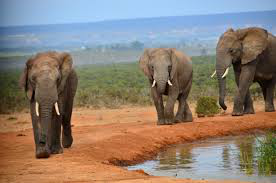

In [109]:
## Class: African elephant

african = list(train_data.glob('African/*'))
PIL.Image.open(str(african[0]))

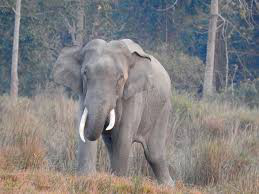

In [114]:
## Class: Asian elephant

asian = list(train_data.glob('Asian/*'))
PIL.Image.open(str(asian[0]))

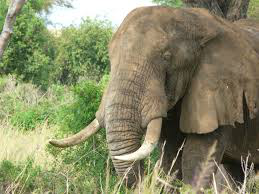

In [115]:
african = list(test_data.glob('African/*'))
PIL.Image.open(str(african[0]))

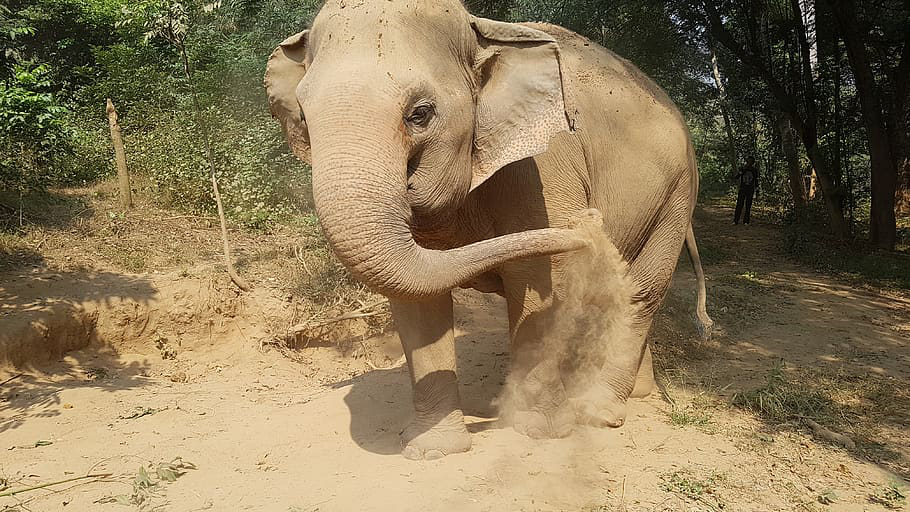

In [116]:
asian = list(test_data.glob('Asian/*'))
PIL.Image.open(str(asian[0]))

In [117]:
batch_size = 32
img_height = 180
img_width = 180


In [118]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 840 files belonging to 2 classes.


In [120]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 199 files belonging to 2 classes.


In [121]:
class_names = train_ds.class_names
print(class_names)

['African', 'Asian']


In [203]:
figsize=(180,180)

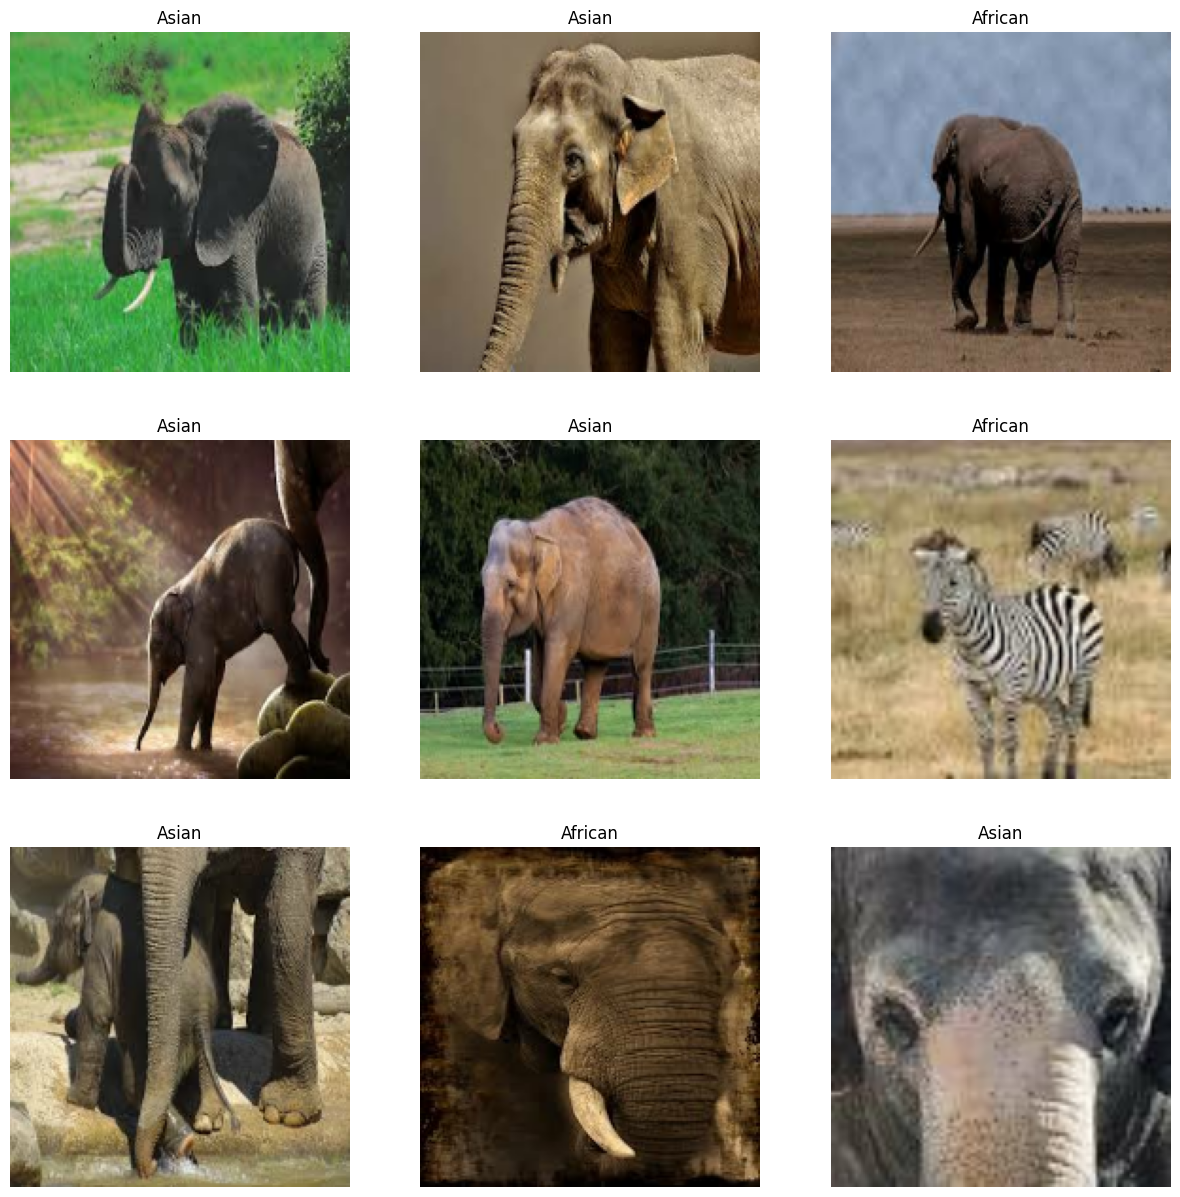

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [127]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [128]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomCrop(img_height,img_width ),
    layers.RandomContrast(0.15),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)


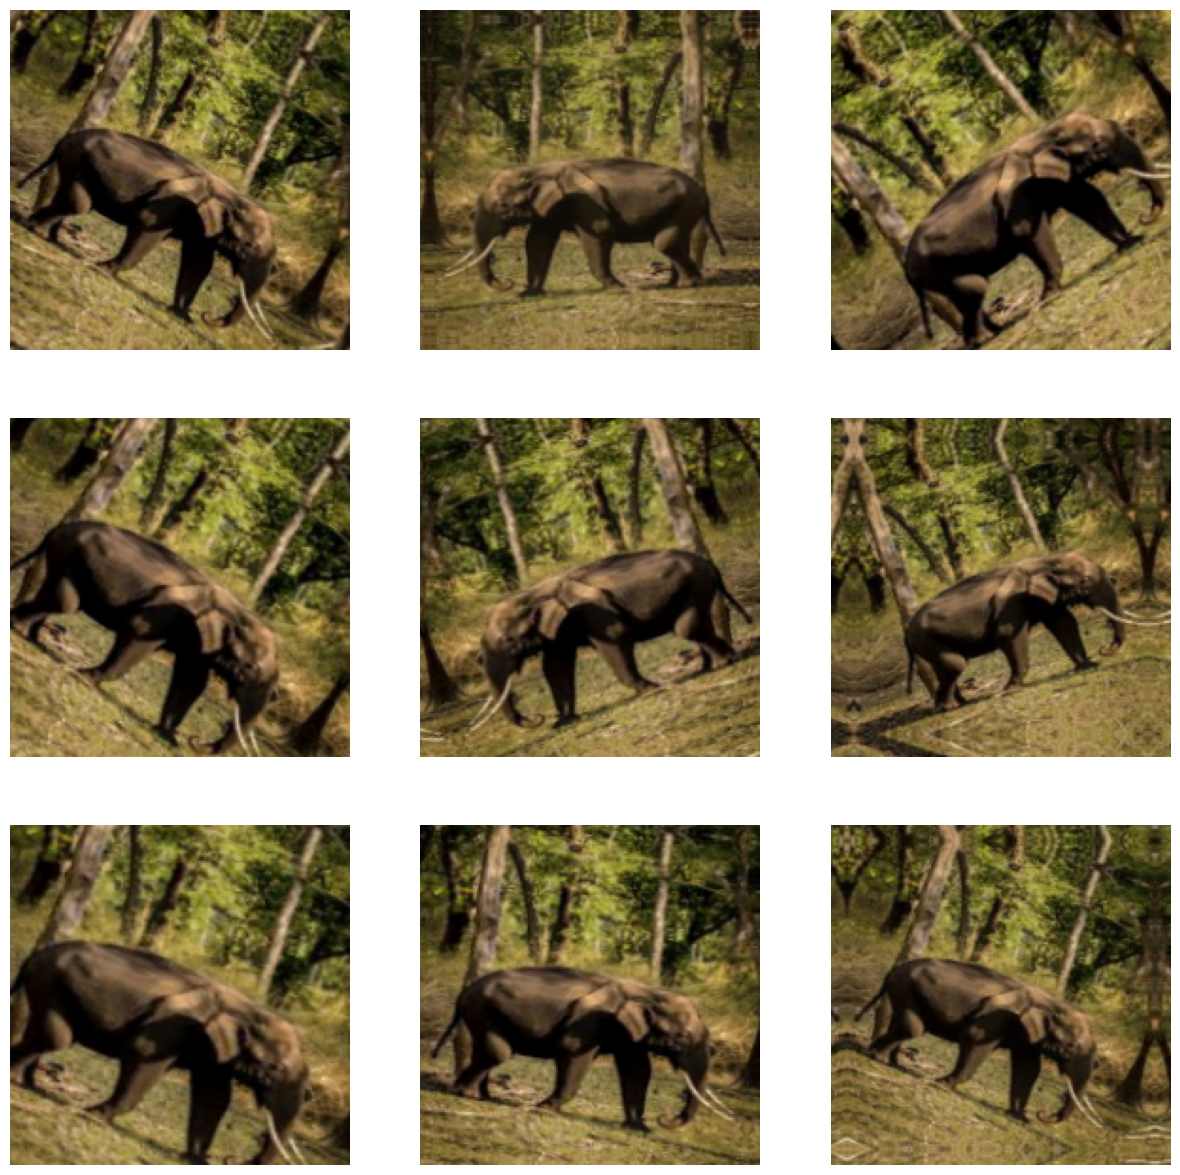

In [129]:
plt.figure(figsize=(15, 15))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [131]:
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a


In [132]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


In [133]:
inputs = keras.Input(shape=figsize)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

In [134]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))


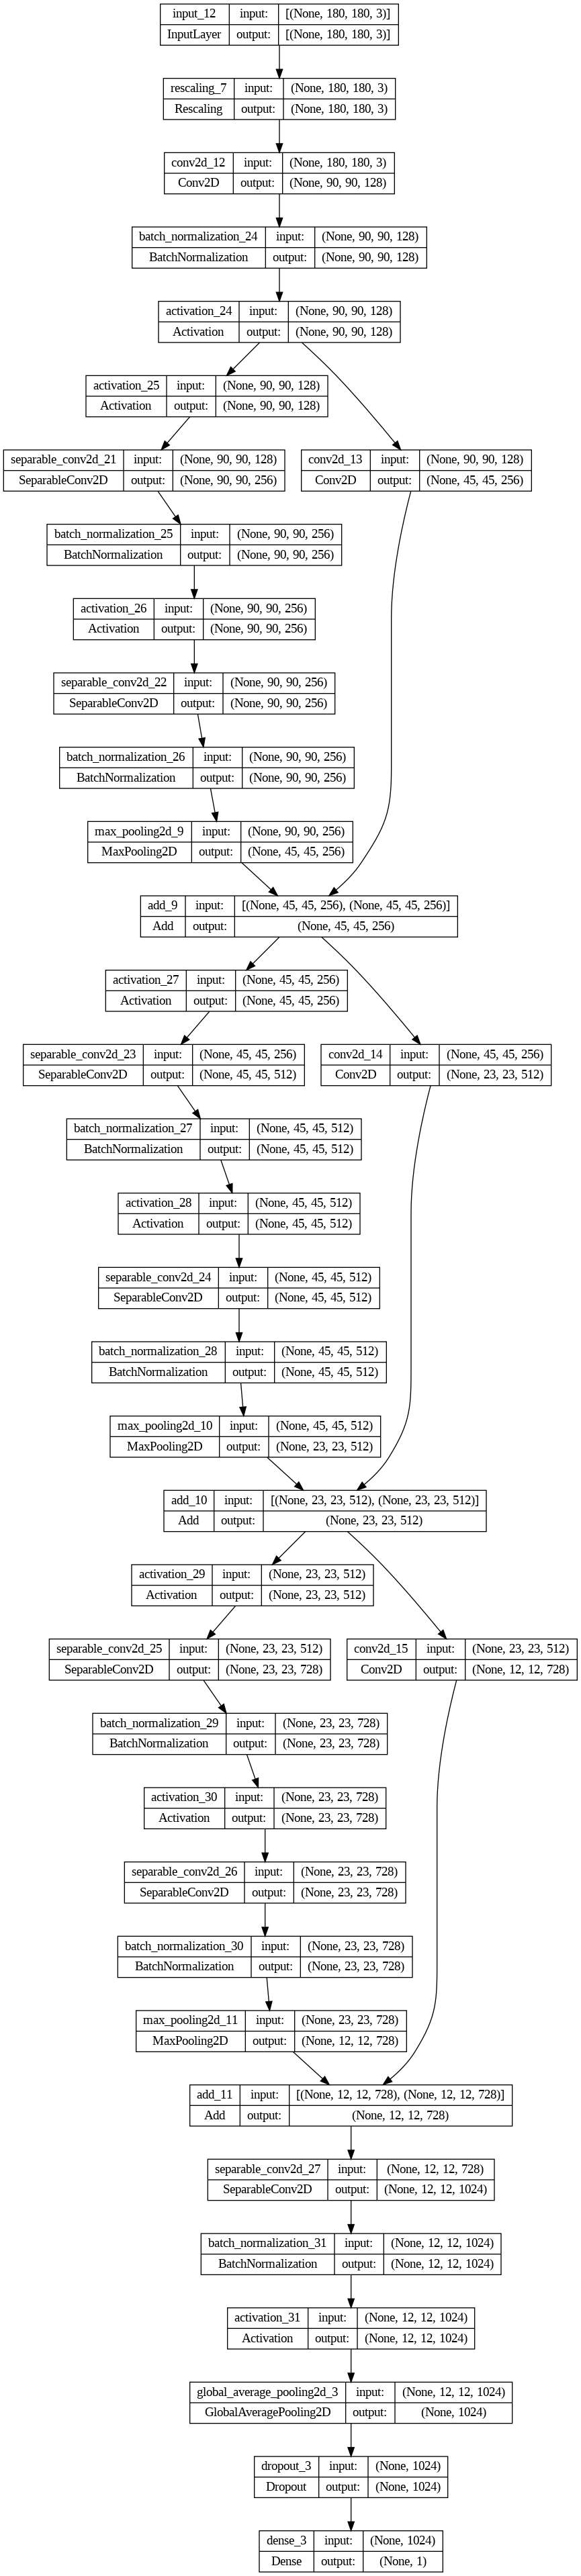

In [135]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=figsize + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [136]:
tf.random.set_seed(1234)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(180, 180, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(25, activation="relu", name="L1"),
    tf.keras.layers.Dense(15, activation="relu", name="L2"),
    tf.keras.layers.Dense(10, activation="linear", name="L3")
], name="my_model")

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

history = model.fit(train_ds, epochs=40, validation_data=test_ds)

Epoch 1/40
27/27 [==============================] - 108s 2s/step - loss: 451.1615 - accuracy: 0.4560 - val_loss: 111.1319 - val_accuracy: 0.5126
Epoch 2/40
27/27 [==============================] - 4s 150ms/step - loss: 33.1450 - accuracy: 0.4940 - val_loss: 55.4231 - val_accuracy: 0.5126
Epoch 3/40
27/27 [==============================] - 5s 165ms/step - loss: 25.8449 - accuracy: 0.5179 - val_loss: 13.8040 - val_accuracy: 0.5327
Epoch 4/40
27/27 [==============================] - 6s 203ms/step - loss: 11.4297 - accuracy: 0.5476 - val_loss: 9.9616 - val_accuracy: 0.5377
Epoch 5/40
27/27 [==============================] - 4s 150ms/step - loss: 18.6011 - accuracy: 0.5500 - val_loss: 48.4064 - val_accuracy: 0.5126
Epoch 6/40
27/27 [==============================] - 7s 263ms/step - loss: 34.7196 - accuracy: 0.4988 - val_loss: 8.2828 - val_accuracy: 0.5879
Epoch 7/40
27/27 [==============================] - 4s 152ms/step - loss: 9.8815 - accuracy: 0.5964 - val_loss: 14.9025 - val_accuracy: 0

In [242]:
from PIL import Image
image_path = '/content/drive/MyDrive/test/African/af_te10.jpg'
image_size = (180, 180)

# Load the image and resize it to the required size
image = Image.open(image_path)
image = image.resize(image_size)

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the pixel values between 0 and 1
image_array = image_array / 255.0

# Add an extra dimension to represent the batch size
input_data = np.expand_dims(image_array, axis=0)
# Get the predicted class probabilities
class_probabilities = model.predict(input_data)[0]
#print(class_probabilities)
# Print the predicted class and its probability
if class_probabilities[2] < class_probabilities[3]:
    print('The image is of an Asian elephant with probability', 100-class_probabilities[0])
else:
    print('The image is of an African elephant with probability', 100-class_probabilities[1])


1/1 [==============================] - 0s 21ms/step
The image is of an African elephant with probability 93.03741645812988


In [243]:
def Prediction_With_Address_of_Image(Address):
  from PIL import Image
  image_path = Address
  image_size = (180, 180)
  # Load the image and resize it to the required size
  image = Image.open(image_path)
  image = image.resize(image_size)
  # Convert the image to a numpy array
  image_array = np.array(image)
  # Normalize the pixel values between 0 and 1
  image_array = image_array / 255.0
  # Add an extra dimension to represent the batch size
  input_data = np.expand_dims(image_array, axis=0)
  # Get the predicted class probabilities
  class_probabilities = model.predict(input_data)[0]
  #print(class_probabilities)
  # Print the predicted class and its probability
  if class_probabilities[2] < class_probabilities[3]:
      print('The image is of an Asian elephant with probability', 100-class_probabilities[0])
  else:
      print('The image is of an African elephant with probability', 100-class_probabilities[1])

In [245]:
Prediction_With_Address_of_Image('/content/drive/MyDrive/test/African/af_te90.jpg')

1/1 [==============================] - 0s 44ms/step
The image is of an African elephant with probability 93.83783435821533


In [248]:
Prediction_With_Address_of_Image('/content/drive/MyDrive/test/Asian/as_te54.jpg')

1/1 [==============================] - 0s 45ms/step
The image is of an Asian elephant with probability 96.28320288658142
